In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

In [3]:
# Creating a file path
path = r'/Users/samarjitgehdu/Documents/Achievement 6/Gun Violence'

In [5]:
path

'/Users/samarjitgehdu/Documents/Achievement 6/Gun Violence'

In [7]:
# Importing the gun violence file
df = pd.read_csv(os.path.join(path,'02 Data', 'Prepared Data', 'Gun_Violence_Clean_Data(2013-2018).csv'))

In [9]:
# Inspect the Dataset
df.shape

(239677, 26)

In [11]:
df.columns

Index(['Unnamed: 0', 'incident_id', 'date', 'state', 'city_or_county',
       'address', 'n_killed', 'n_injured', 'incident_url', 'source_url',
       'incident_url_fields_missing', 'congressional_district', 'gun_stolen',
       'gun_type', 'incident_characteristics', 'latitude', 'longitude',
       'n_guns_involved', 'notes', 'participant_age_group',
       'participant_gender', 'participant_status', 'participant_type',
       'sources', 'state_house_district', 'state_senate_district'],
      dtype='object')

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239677 entries, 0 to 239676
Data columns (total 26 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   239677 non-null  int64  
 1   incident_id                  239677 non-null  int64  
 2   date                         239677 non-null  object 
 3   state                        239677 non-null  object 
 4   city_or_county               239677 non-null  object 
 5   address                      239677 non-null  object 
 6   n_killed                     239677 non-null  int64  
 7   n_injured                    239677 non-null  int64  
 8   incident_url                 239677 non-null  object 
 9   source_url                   239677 non-null  object 
 10  incident_url_fields_missing  239677 non-null  bool   
 11  congressional_district       239677 non-null  float64
 12  gun_stolen                   239677 non-null  object 
 13 

In [15]:
# Drop the Unnamed column as it is of no use here.
df = df.drop(columns=['Unnamed: 0', 'incident_id', 'date', 'incident_url', 'source_url', 'operations'], errors='ignore')

In [17]:
# Verify the drop
df.columns

Index(['state', 'city_or_county', 'address', 'n_killed', 'n_injured',
       'incident_url_fields_missing', 'congressional_district', 'gun_stolen',
       'gun_type', 'incident_characteristics', 'latitude', 'longitude',
       'n_guns_involved', 'notes', 'participant_age_group',
       'participant_gender', 'participant_status', 'participant_type',
       'sources', 'state_house_district', 'state_senate_district'],
      dtype='object')

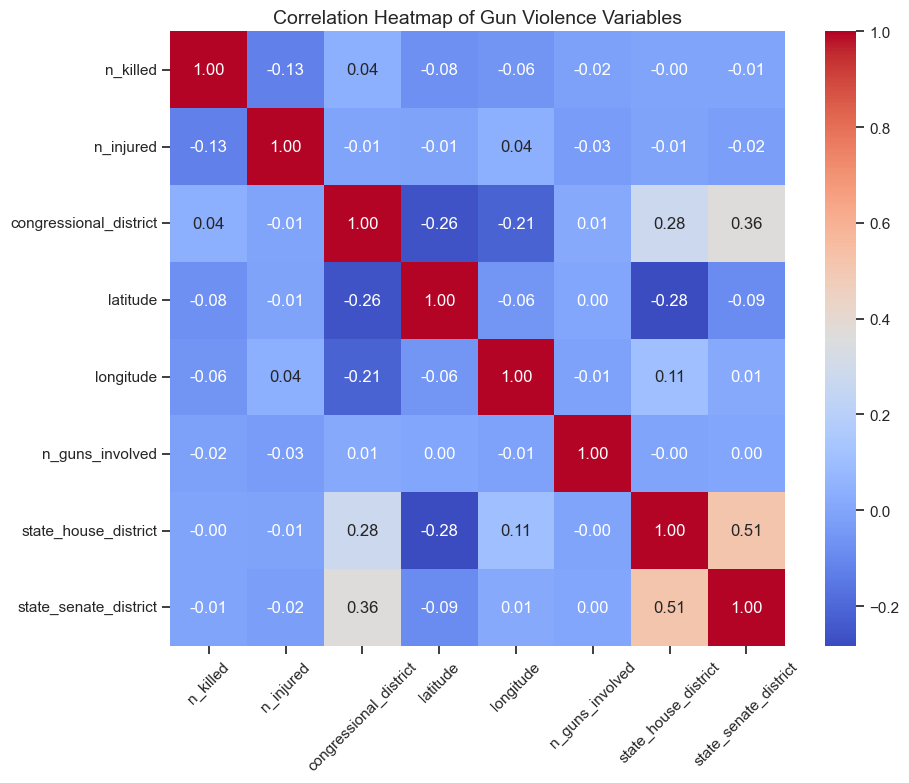

In [96]:
# STEP 3: Select numeric columns and create a correlation heatmap
numeric_df = df.select_dtypes(include=['int64', 'float64'])

plt.figure(figsize=(10, 8))
Correlation_heatmap = sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Correlation Heatmap of Gun Violence Variables', fontsize=14)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [25]:
# Export the heatmap
Correlation_heatmap.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Correlation_heatmap.png'))

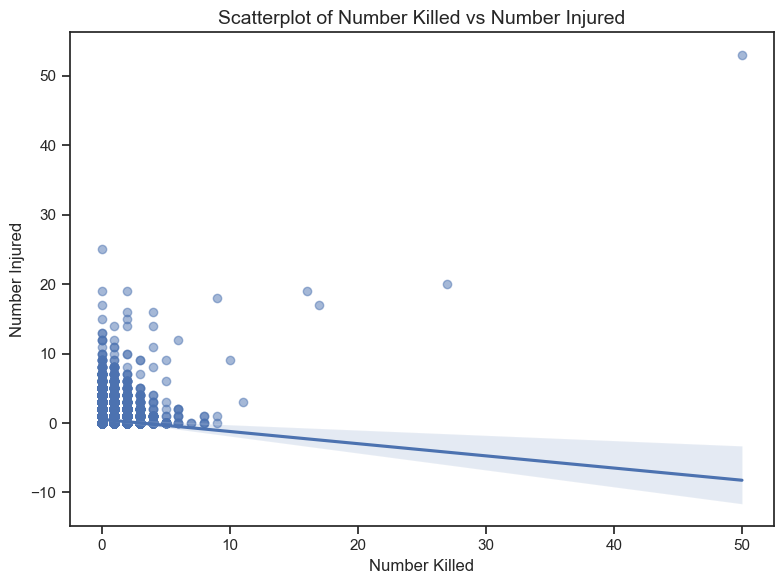

In [95]:
# STEP 4: Create scatterplot for strongest correlation (n_killed vs n_injured)
plt.figure(figsize=(8, 6))
Scatterplot = sns.regplot(data=numeric_df, x='n_killed', y='n_injured', scatter_kws={'alpha': 0.5})
plt.title('Scatterplot of Number Killed vs Number Injured', fontsize=14)
plt.xlabel('Number Killed')
plt.ylabel('Number Injured')
plt.tight_layout()
plt.show()

In [29]:
# Export the Scatterplot
Scatterplot.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Scatterplot_killedvsinjured.png'))

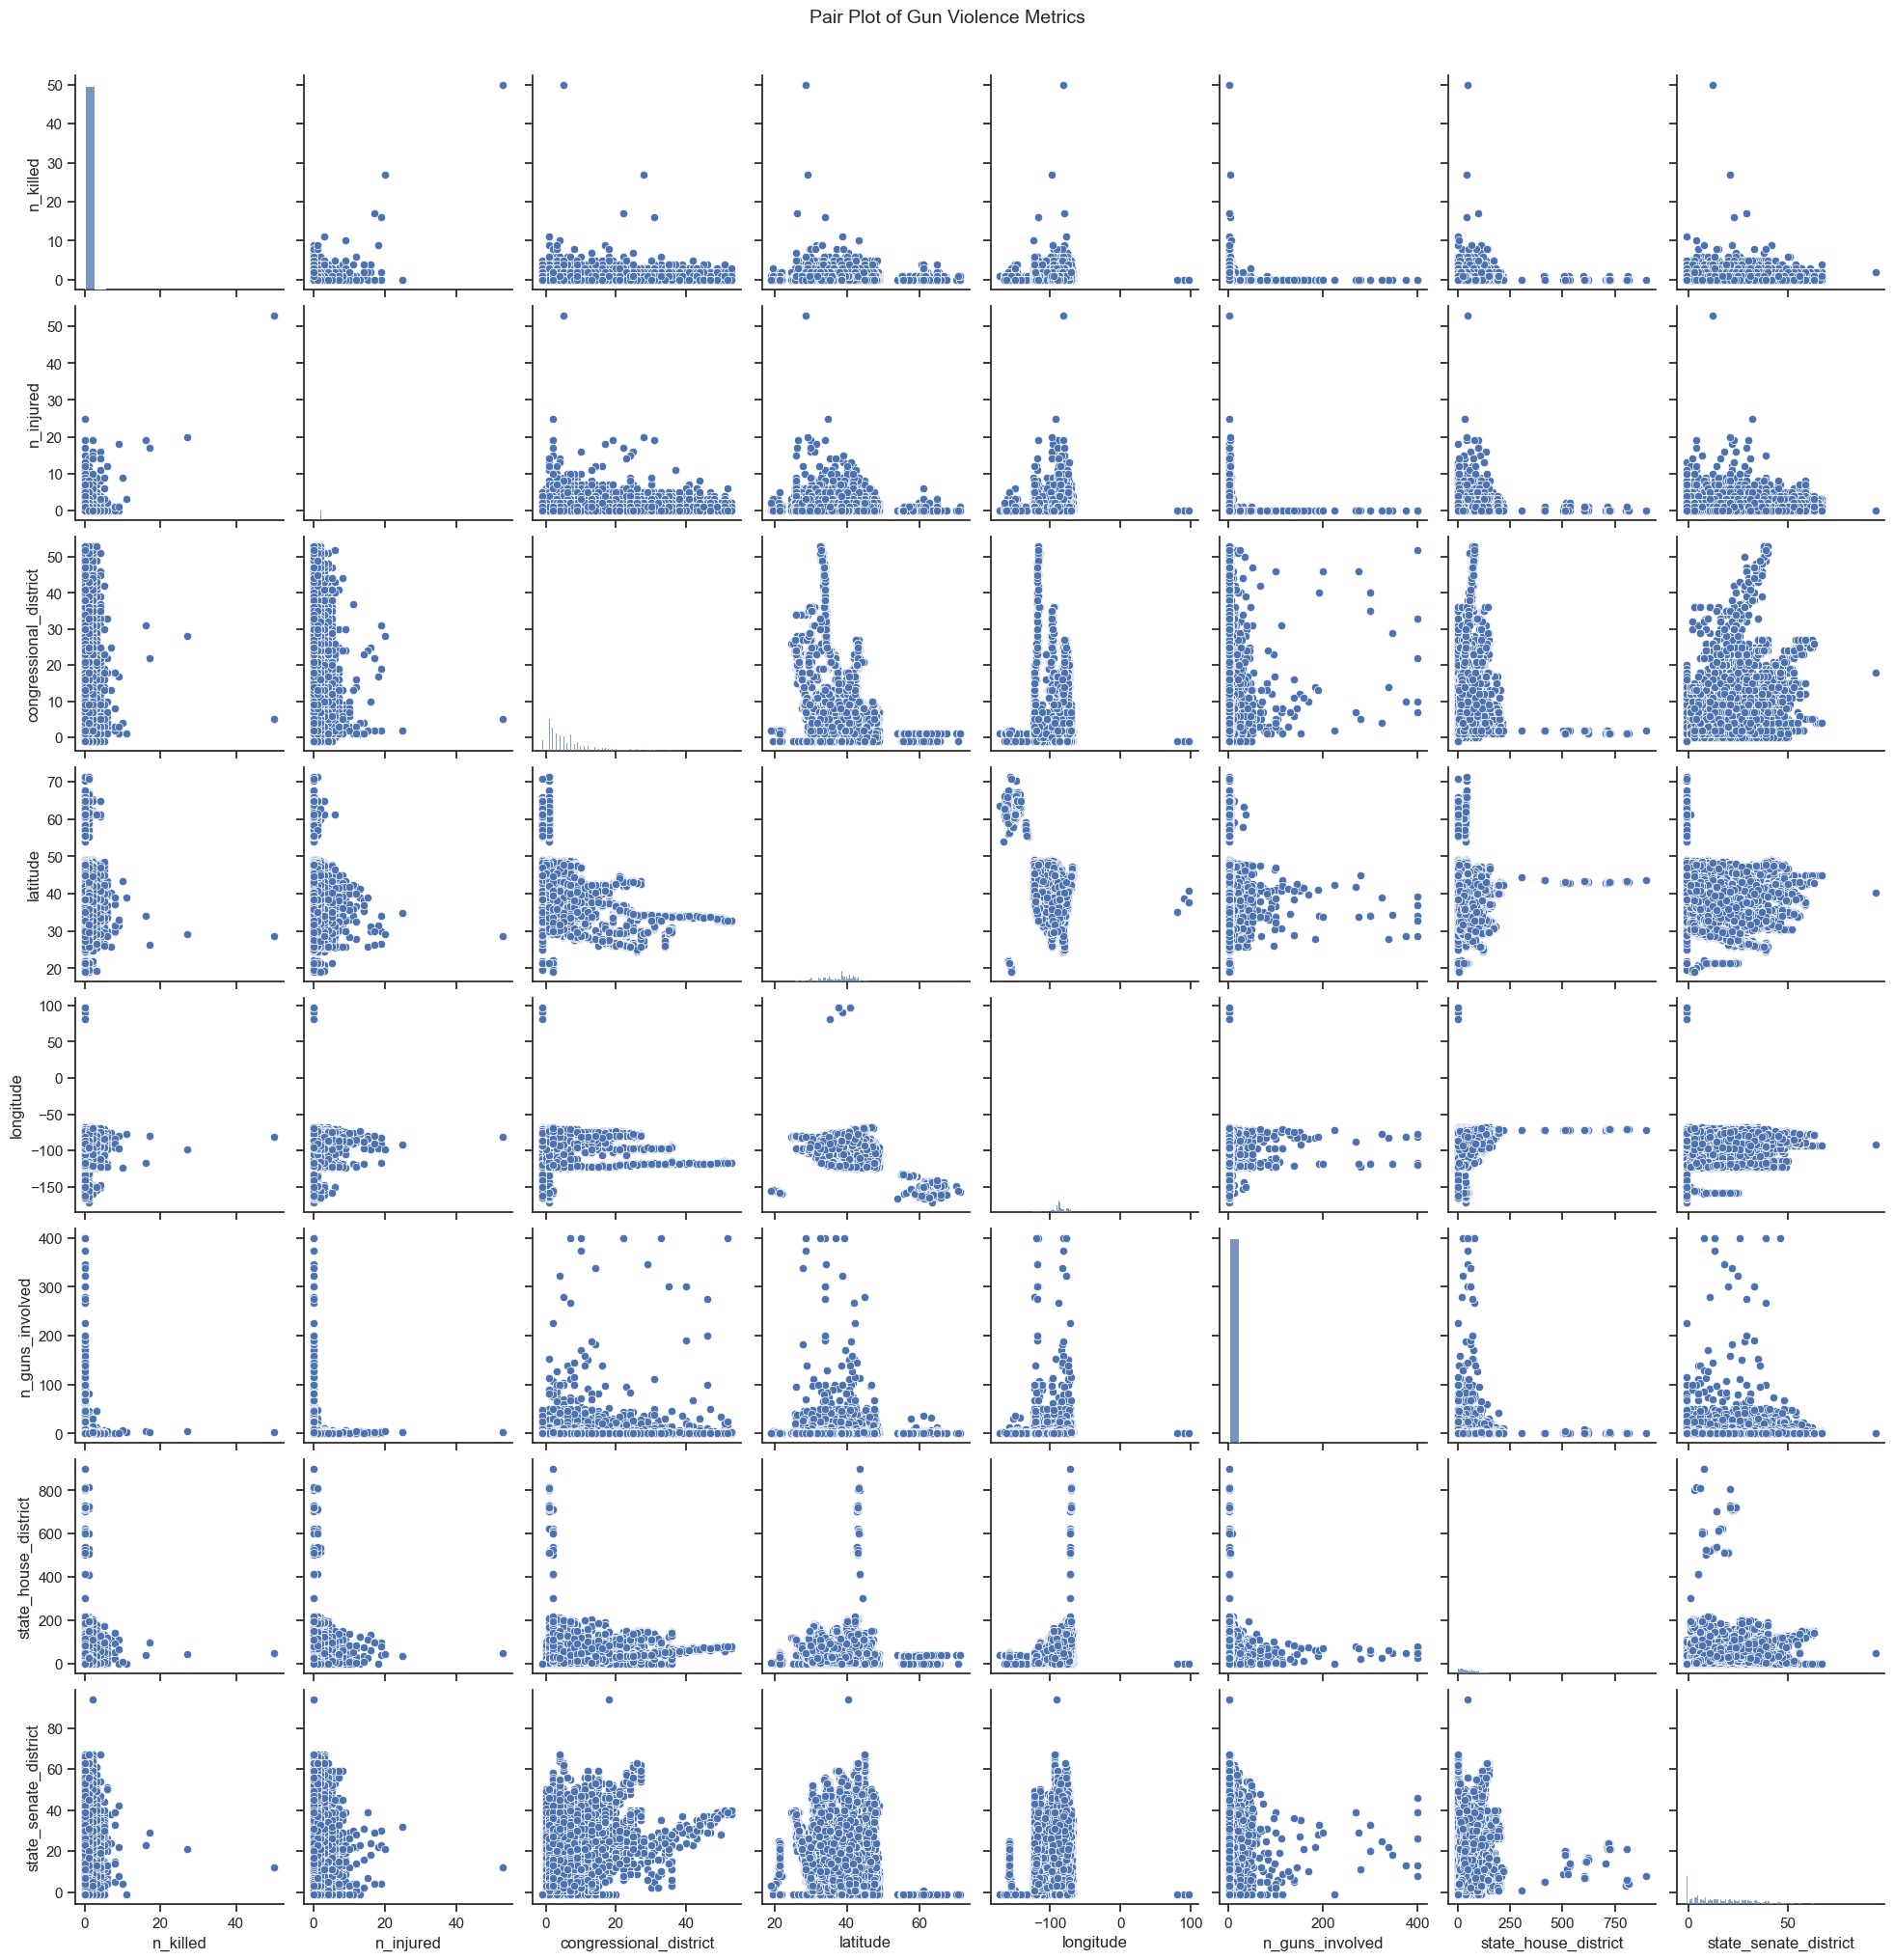

In [93]:
# STEP 5: Pairwise plot of all numerical variables
Pairplot = sns.pairplot(numeric_df)
plt.suptitle("Pair Plot of Gun Violence Metrics", y=1.02, fontsize=14)
plt.show()

Since the pair plot chart is looking very ambiguous demonstrating so much information we will try to reduce the columns in it

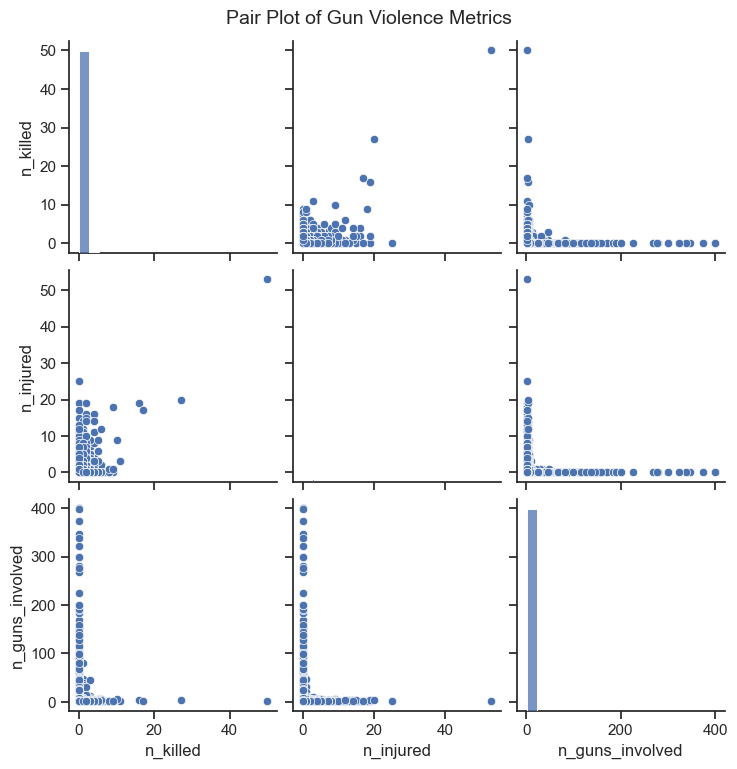

In [91]:
# STEP 5: Pair plot for key numerical variables
# Choosing 'n_killed', 'n_injured', and 'n_guns_involved'
Pairplot_data = df[['n_killed', 'n_injured', 'n_guns_involved']]
Pairplot_Chart = sns.pairplot(Pairplot_data)
plt.suptitle("Pair Plot of Gun Violence Metrics", y=1.02, fontsize=14)
plt.show()

This version helps visualize the data better.

In [47]:
# Export the Scatterplot
Pairplot_Chart.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Pairplot_Chart.png'))

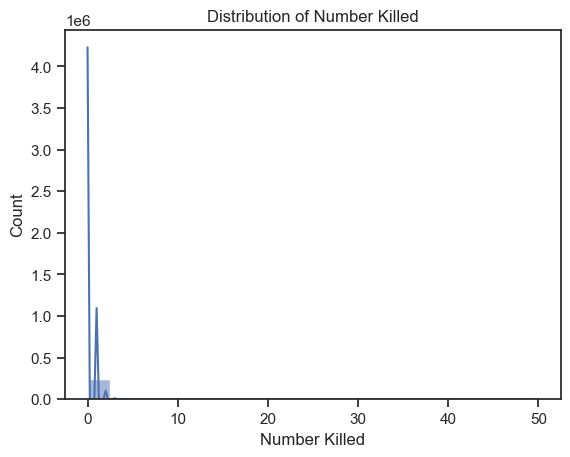

In [89]:
# STEP 6: Categorical Plot — Histogram of fatalities
# This gives an overview of how often different fatality counts occur
Hist = sns.histplot(data = df, x = 'n_killed', bins = 20, kde = True)
plt.xlabel('Number Killed')
plt.ylabel('Count')
plt.title('Distribution of Number Killed')
plt.show()

In [57]:
df.loc[df['n_killed'] < 5, 'Death Count'] = 'Low death count'

In [61]:
df.loc[(df['n_killed'] >= 5) & (df['n_killed'] < 10), 'Death Count'] = 'Medium death count'

In [63]:
df.loc[df['n_killed'] >= 10, 'Death Count'] = 'High death count'

In [65]:
df['Death Count'].value_counts(dropna = False)

Death Count
Low death count       239609
Medium death count        62
High death count           6
Name: count, dtype: int64

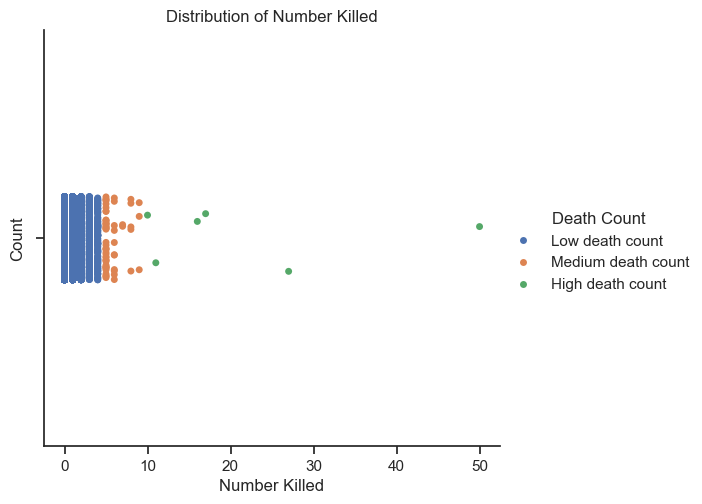

In [79]:
# Create a categorical plot in seaborn using the price categories created above

sns.set(style = "ticks")
g = sns.catplot(x = "n_killed", hue = "Death Count", data = df)
plt.xlabel('Number Killed')
plt.ylabel('Count')
plt.title('Distribution of Number Killed')
plt.show()

In [81]:
# Export the Categorical plot
g.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Categorical_plot.png'))

### Step 7: Answering Research Questions

#### 1. Temporal Analysis
Not yet covered — requires parsing the `date` column.

#### 2. Geographic Distribution
Not yet visualized — could use state-based aggregation and mapping.

#### 3. Incident Characteristics
 Positive correlation between injuries and deaths.
 Most incidents have low counts — few with multiple casualties.

#### 4. Demographics
Not yet explored — will require processing participant columns.

#### 5. Correlation with External Factors
Some weak correlations with `n_guns_involved`.
Suggests need for joining with external datasets.

#### 6. Policy Impact
Not yet addressed — needs policy timeline overlays.

#### New Questions:
Are mass shootings always tied to stolen weapons?
What percentage of high-fatality incidents involve 3+ guns?

###  STEP 8: Hypotheses to Test

#### Hyothesis: Guns vs Casualties
- H₀: Number of guns involved does not impact total casualties.
- H₁: More guns = more injuries/fatalities.
> Test: Pearson correlation or regression